**ML Production**

In [57]:
# We will use all the models available to us for ML training and experiment a little bit with Neural Network models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv('training_set_timed.csv').dropna()
data.head()

,Unnamed: 0,person,object,speed,frames,time
0,0,11.302885,0.283654,1.403075,208.0,13.483680
1,1,1.140000,0.560000,2.374617,50.0,1.450127
2,2,1.943329,0.741440,0.669307,847.0,9.794604
3,3,1.000863,1.316652,0.796265,1159.0,24.911718
4,4,2.747253,0.957418,1.098094,728.0,8.418502


In [4]:
# We will create a dictionary with key:value pairs for the models

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'StackingRegressor': StackingRegressor(estimators=500),
    'VotingRegressor': VotingRegressor(estimators=500),
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    'CatBoostRegressor': CatBoostRegressor(),
}

In [5]:
# For each model in this dictionary we will perform a grid search on our data set
# For that purpose we need a dictionary with all the parameters for each model

param_grids = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]},
    'SVR': {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100]},
    'KNeighborsRegressor': {'n_neighbors': [3, 5, 7]},
    'DecisionTreeRegressor': {'max_depth': [None, 10, 20, 30]},
    'RandomForestRegressor': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'GradientBoostingRegressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoostRegressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'ExtraTreesRegressor': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'BaggingRegressor': {'n_estimators': [10, 50, 100]},
    'StackingRegressor': {},  
    'VotingRegressor': {},    
    'XGBRegressor': {'n_estimators': [50, 100, 400], 'learning_rate': [0.01, 0.1, 0.2]},
    'LGBMRegressor': {'n_estimators': [50, 100, 400], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoostRegressor': {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'verbose': ['False']},
}



In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=42)

In [7]:
best_models = {}


for name, model in models.items():
    print(f"Training {name}...")
    param_grid = param_grids.get(name, {}) 
    try:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Evaluation
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        score = r2_score(y_test, y_pred)

        print(f"{name} R2 Score: {score:.4f}")

        # Keep models with accuracy > 95%
        if score >= 0.95:
            best_models[name] = best_model
    except Exception as e:
        print(f"Error training {name}: {e}")

Training LinearRegression...
LinearRegression R2 Score: 0.2769
Training Ridge...
Ridge R2 Score: 0.2768
Training Lasso...
Lasso R2 Score: 0.2717
Training ElasticNet...
ElasticNet R2 Score: 0.2718
Training SVR...
SVR R2 Score: 0.5792
Training KNeighborsRegressor...
KNeighborsRegressor R2 Score: 0.9963
Training DecisionTreeRegressor...
DecisionTreeRegressor R2 Score: 1.0000
Training RandomForestRegressor...
RandomForestRegressor R2 Score: 0.9997
Training GradientBoostingRegressor...
GradientBoostingRegressor R2 Score: 1.0000
Training AdaBoostRegressor...
AdaBoostRegressor R2 Score: 0.9795
Training ExtraTreesRegressor...
ExtraTreesRegressor R2 Score: 0.9995
Training BaggingRegressor...
BaggingRegressor R2 Score: 0.9997
Training StackingRegressor...
Error training StackingRegressor: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
---------------------------

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not

Error training LGBMRegressor: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/lightgbm/sklearn.py", line 1189, in fit
    super().fit(
  File "/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/lightgbm/sklearn.py", line 955, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/lightgbm/engine.py", line 282, in train


In [24]:
# We have some models thast work well. We could investigate  the models that did not work for better parameters or the correct settings. 
# Lets give a try to the MLPRegressor too
mlp = MLPRegressor(hidden_layer_sizes= (100,100), 
                  activation='relu', 
                  n_iter_no_change=10000,
                  verbose=True,
                  max_iter=10000,
                  learning_rate='adaptive',
                  )


In [25]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1541.88964023
Iteration 2, loss = 1391.90252250
Iteration 3, loss = 839.02623977
Iteration 4, loss = 838.75987026
Iteration 5, loss = 693.47423185
Iteration 6, loss = 708.59647346
Iteration 7, loss = 866.80971434
Iteration 8, loss = 673.71247126
Iteration 9, loss = 645.39475081
Iteration 10, loss = 645.64774154
Iteration 11, loss = 608.31010546
Iteration 12, loss = 690.05315131
Iteration 13, loss = 639.36464823
Iteration 14, loss = 610.69600323
Iteration 15, loss = 615.26338000
Iteration 16, loss = 604.71645394
Iteration 17, loss = 632.73913095
Iteration 18, loss = 617.84094501
Iteration 19, loss = 611.33306089
Iteration 20, loss = 605.03611952
Iteration 21, loss = 596.41746456
Iteration 22, loss = 614.32998434
Iteration 23, loss = 602.26338379
Iteration 24, loss = 593.79040038
Iteration 25, loss = 593.02467446
Iteration 26, loss = 606.53838946
Iteration 27, loss = 605.70981133
Iteration 28, loss = 587.27732610
Iteration 29, loss = 592.64645795
Iteration 30, loss = 

/home/admin1997/miniconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100), learning_rate='adaptive',
             max_iter=10000, n_iter_no_change=10000, verbose=True)

In [28]:
y_pred = mlp.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)


0.546034515920536


In [46]:
evaluation_results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    evaluation_results.append({
        'Model': name,
        'R2 Score': r2,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae
    })
metrics = pd.DataFrame(evaluation_results)


In [48]:
metrics

,Model,R2 Score,Mean Squared Error,Mean Absolute Error
0,KNeighborsRegressor,0.996334,5.419703,1.120134
1,DecisionTreeRegressor,0.999987,0.019434,0.060541
2,RandomForestRegressor,0.999701,0.442293,0.151517
3,GradientBoostingRegressor,0.999992,0.011217,0.074107
4,AdaBoostRegressor,0.979480,30.338635,4.286008
5,ExtraTreesRegressor,0.999473,0.779091,0.434993
6,BaggingRegressor,0.999686,0.463661,0.145882
7,XGBRegressor,0.999083,1.356219,0.330628
8,CatBoostRegressor,0.955275,66.125041,2.143017


In [52]:
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
    plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

def plot_residuals(model, X, y):
    y_pred = model.predict(X)
    residuals = y - y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()



def evaluate_model_cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=10, scoring='r2')
    print(f"CV Scores: {scores}")
    print(f"Mean Score: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}")






Evaluating Model: KNeighborsRegressor
Cross-Validation for KNeighborsRegressor:
CV Scores: [0.90980335 0.91170172 0.9122115  0.94953924 0.98148249 0.91346372
 0.88072414 0.9733506  0.92044004 0.74327449]
Mean Score: 0.9096, Std Dev: 0.0628
--------------------------------------------------
Plotting Learning Curve for KNeighborsRegressor...


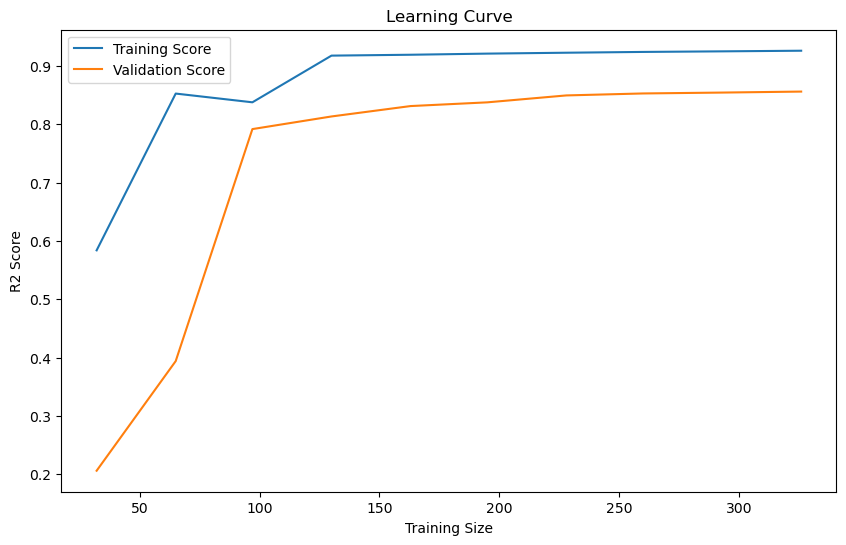

Plotting Residuals for KNeighborsRegressor...


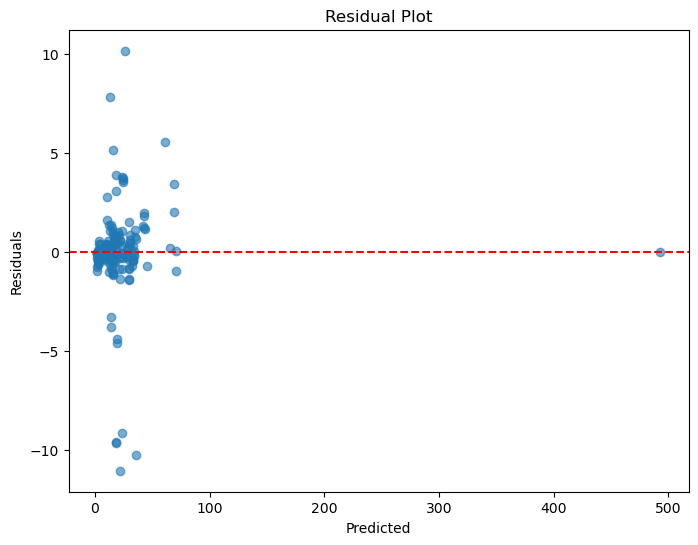

Evaluating Model: DecisionTreeRegressor
Cross-Validation for DecisionTreeRegressor:
CV Scores: [0.99998923 0.99999779 0.99999583 0.99974312 0.9996036  0.9987733
 0.99979228 0.99967466 0.99986586 0.99978104]
Mean Score: 0.9997, Std Dev: 0.0003
--------------------------------------------------
Plotting Learning Curve for DecisionTreeRegressor...


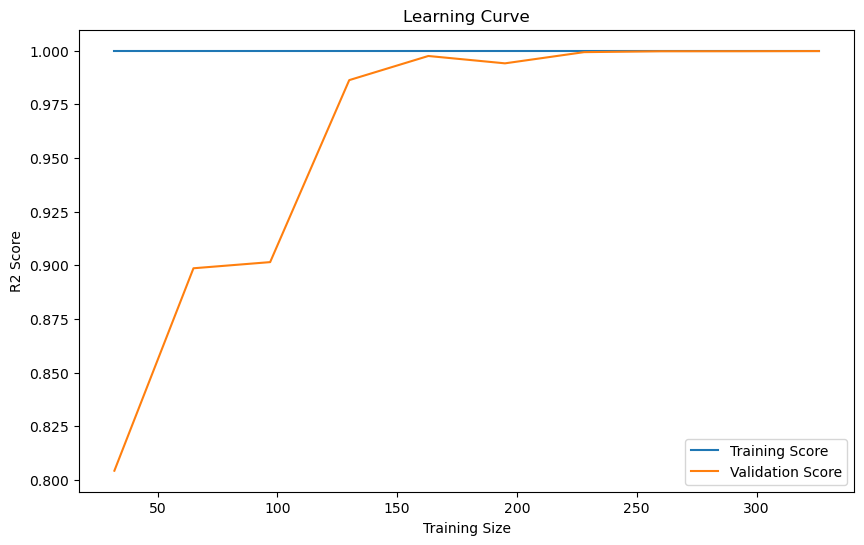

Plotting Residuals for DecisionTreeRegressor...


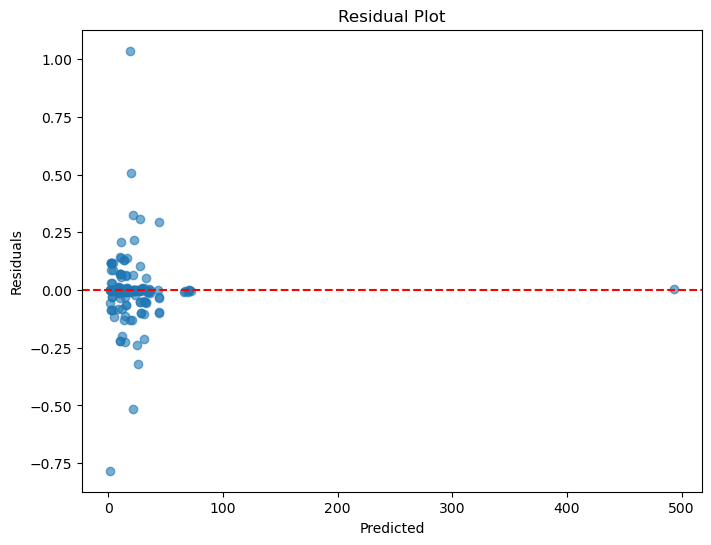

Evaluating Model: RandomForestRegressor
Cross-Validation for RandomForestRegressor:
CV Scores: [0.99715551 0.99495676 0.98467152 0.99978114 0.99951336 0.99937589
 0.99973819 0.99975624 0.99980945 0.99903549]
Mean Score: 0.9974, Std Dev: 0.0045
--------------------------------------------------
Plotting Learning Curve for RandomForestRegressor...


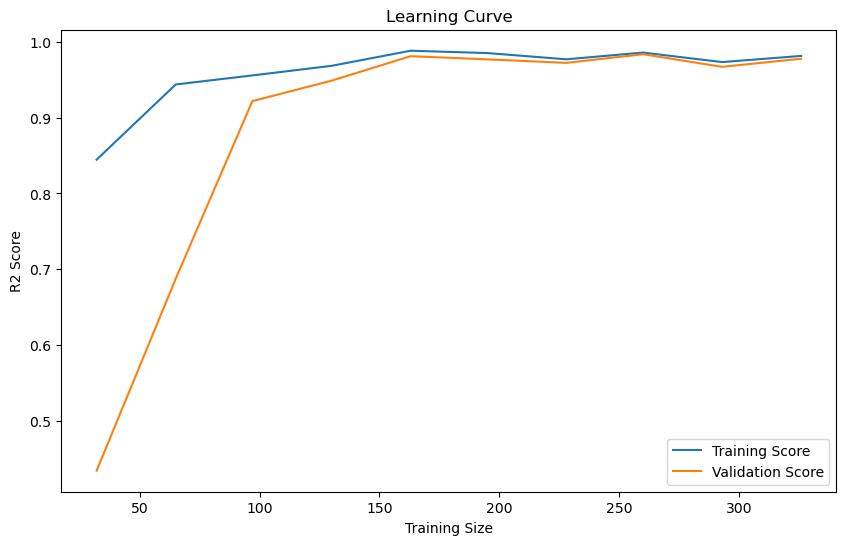

Plotting Residuals for RandomForestRegressor...


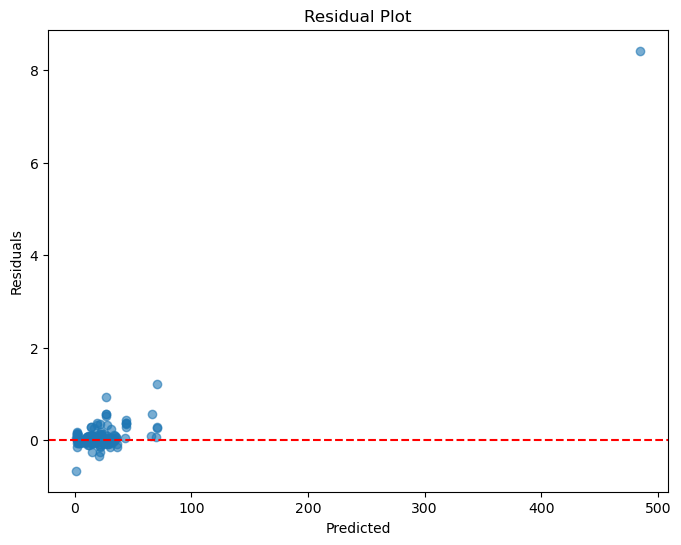

Evaluating Model: GradientBoostingRegressor
Cross-Validation for GradientBoostingRegressor:
CV Scores: [0.99999561 0.99999789 0.99999482 0.99969764 0.99988595 0.99984777
 0.99985994 0.99980902 0.99993014 0.99990657]
Mean Score: 0.9999, Std Dev: 0.0001
--------------------------------------------------
Plotting Learning Curve for GradientBoostingRegressor...


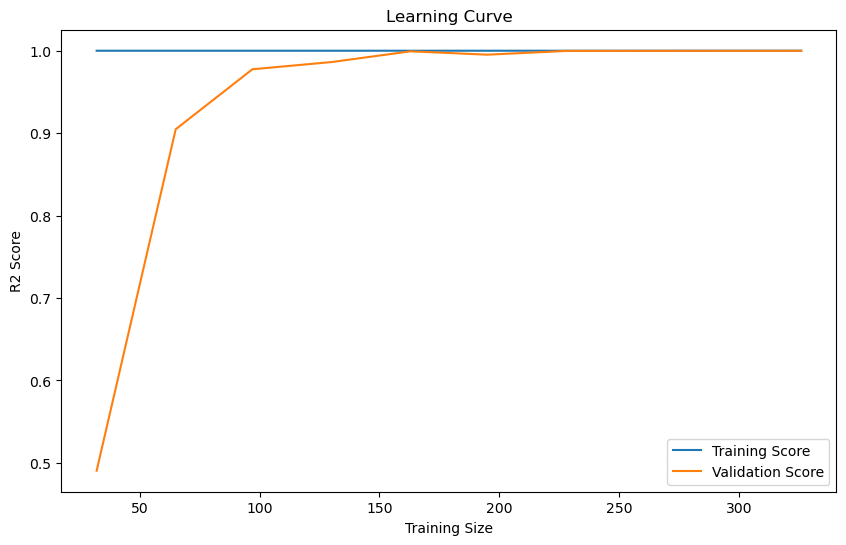

Plotting Residuals for GradientBoostingRegressor...


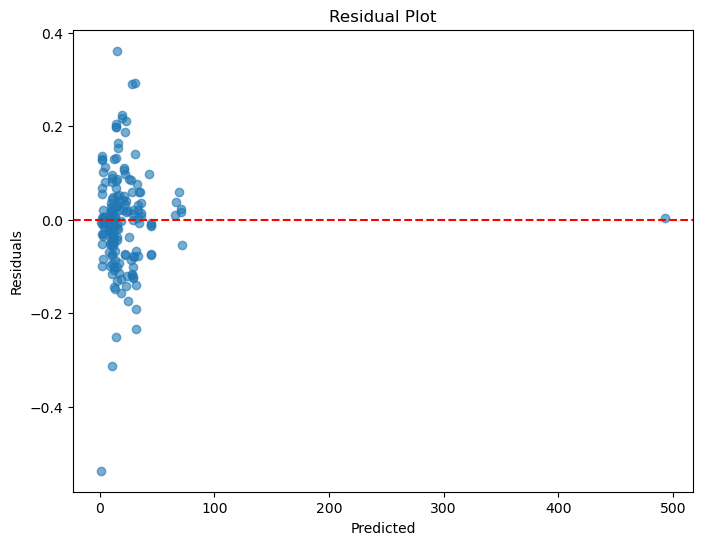

Evaluating Model: AdaBoostRegressor
Cross-Validation for AdaBoostRegressor:
CV Scores: [0.99585486 0.9941752  0.99412734 0.79817503 0.88092833 0.71860898
 0.77989151 0.84254995 0.86346076 0.71487102]
Mean Score: 0.8583, Std Dev: 0.1032
--------------------------------------------------
Plotting Learning Curve for AdaBoostRegressor...


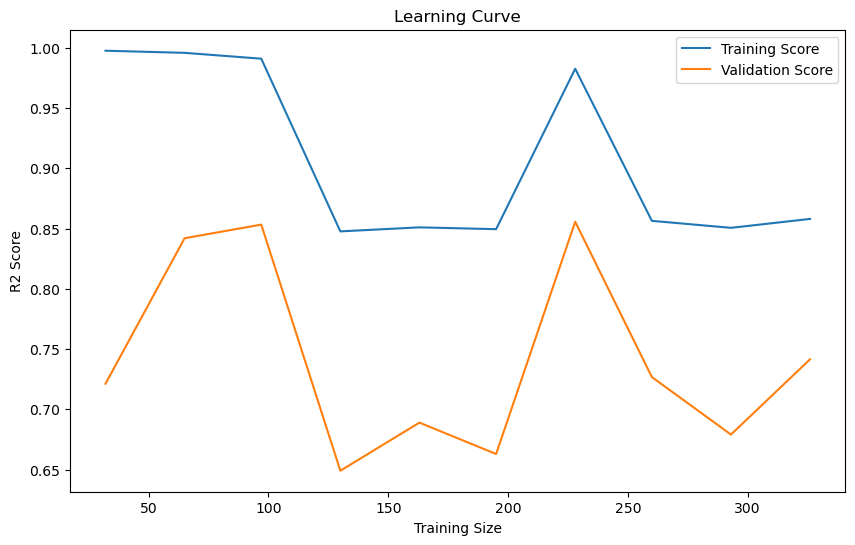

Plotting Residuals for AdaBoostRegressor...


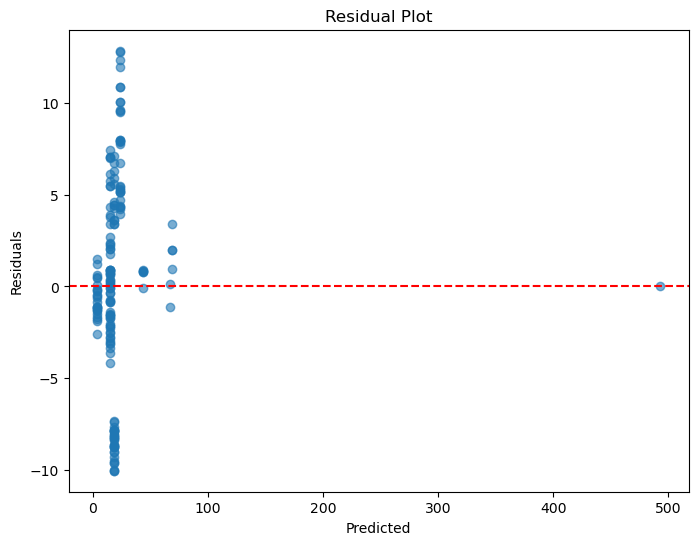

Evaluating Model: ExtraTreesRegressor
Cross-Validation for ExtraTreesRegressor:
CV Scores: [0.99980664 0.99942989 0.9989798  0.99280589 0.98840612 0.98549683
 0.99177144 0.99348946 0.9939922  0.97604127]
Mean Score: 0.9920, Std Dev: 0.0069
--------------------------------------------------
Plotting Learning Curve for ExtraTreesRegressor...


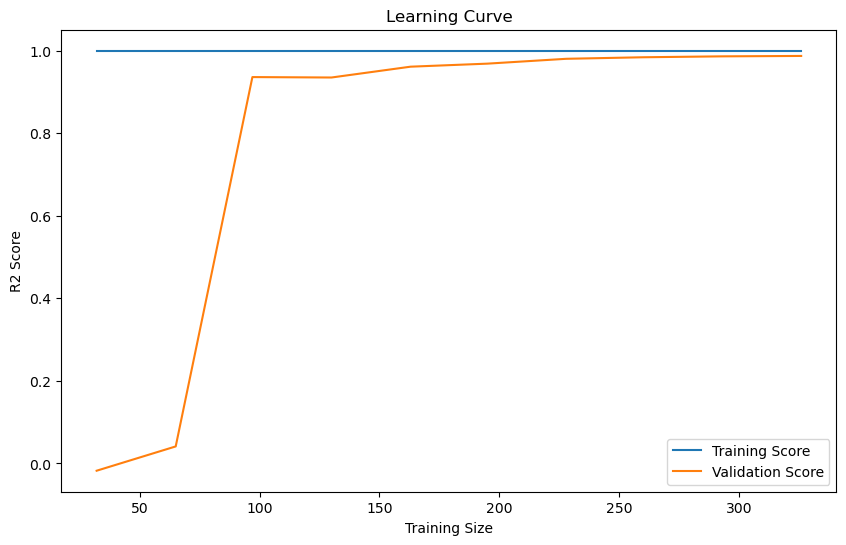

Plotting Residuals for ExtraTreesRegressor...


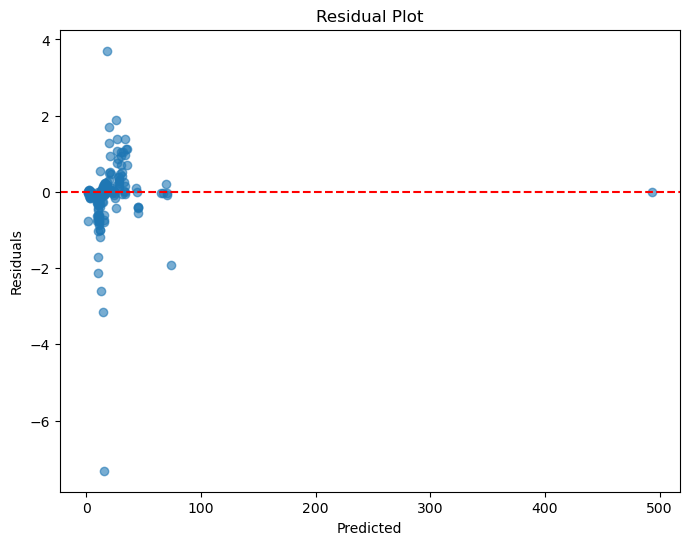

Evaluating Model: BaggingRegressor
Cross-Validation for BaggingRegressor:
CV Scores: [0.98860289 0.99213556 0.98873274 0.99948191 0.99933181 0.99957264
 0.9998687  0.99964902 0.99990009 0.99855705]
Mean Score: 0.9966, Std Dev: 0.0045
--------------------------------------------------
Plotting Learning Curve for BaggingRegressor...


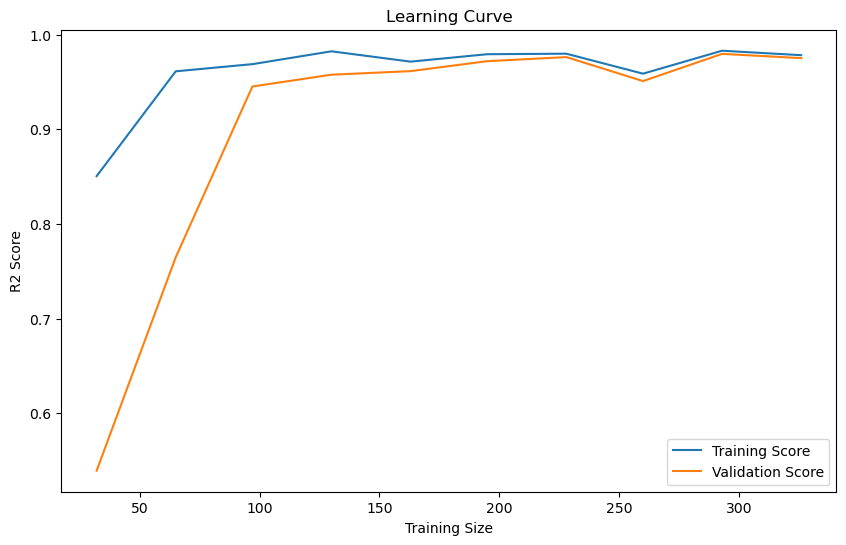

Plotting Residuals for BaggingRegressor...


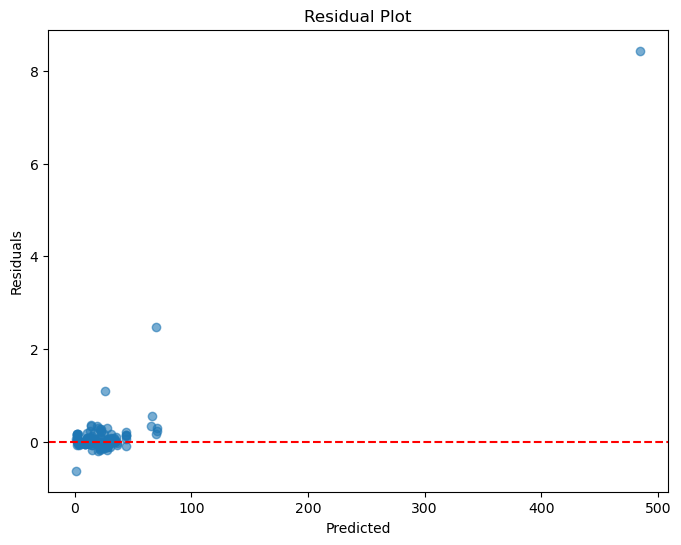

Evaluating Model: XGBRegressor
Cross-Validation for XGBRegressor:
CV Scores: [0.21295324 0.99998882 0.99978578 0.98802148 0.98390063 0.99321078
 0.8855582  0.96493044 0.99847707 0.96889907]
Mean Score: 0.8996, Std Dev: 0.2312
--------------------------------------------------
Plotting Learning Curve for XGBRegressor...


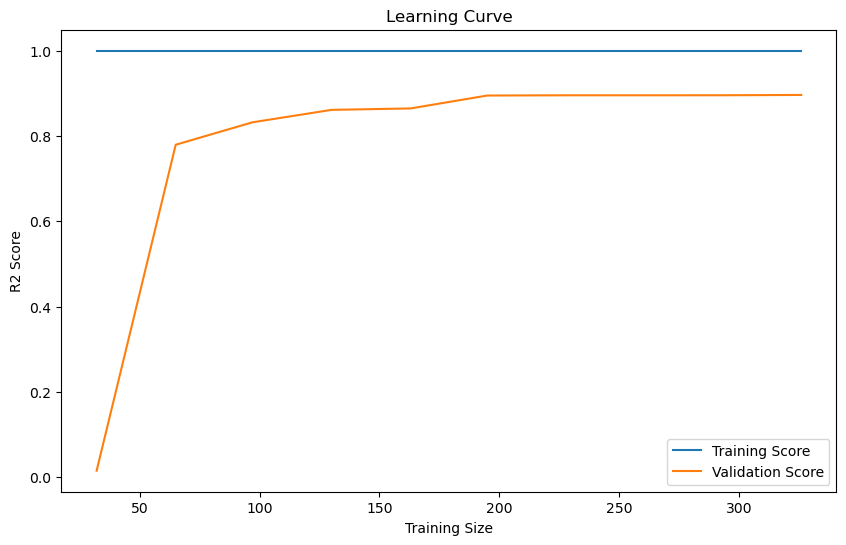

Plotting Residuals for XGBRegressor...


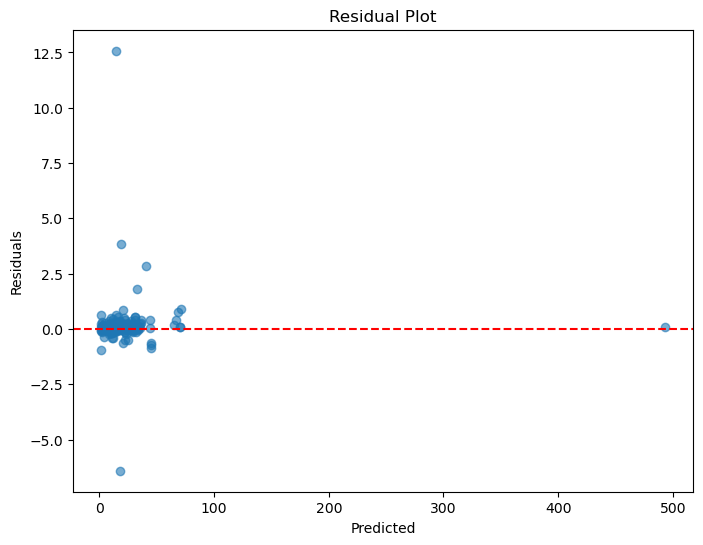

Evaluating Model: CatBoostRegressor
Cross-Validation for CatBoostRegressor:
0:	learn: 36.3040604	total: 2.74ms	remaining: 545ms
1:	learn: 34.9627021	total: 4.51ms	remaining: 447ms
2:	learn: 33.6318740	total: 5.9ms	remaining: 388ms
3:	learn: 32.4032733	total: 7.42ms	remaining: 364ms
4:	learn: 31.2753942	total: 10.8ms	remaining: 421ms
5:	learn: 30.0142610	total: 12.6ms	remaining: 408ms
6:	learn: 29.0112406	total: 14.4ms	remaining: 397ms
7:	learn: 27.9863480	total: 16.3ms	remaining: 391ms
8:	learn: 26.8942604	total: 18.1ms	remaining: 384ms
9:	learn: 25.9503898	total: 20ms	remaining: 379ms
10:	learn: 25.0902726	total: 22.6ms	remaining: 389ms
11:	learn: 24.2884987	total: 24.6ms	remaining: 386ms
12:	learn: 23.5359650	total: 25.9ms	remaining: 373ms
13:	learn: 22.7579118	total: 27.2ms	remaining: 361ms
14:	learn: 22.0448224	total: 28.7ms	remaining: 354ms
15:	learn: 21.1774807	total: 30.2ms	remaining: 347ms
16:	learn: 20.4016201	total: 31.3ms	remaining: 337ms
17:	learn: 20.0243756	total: 32.4ms	

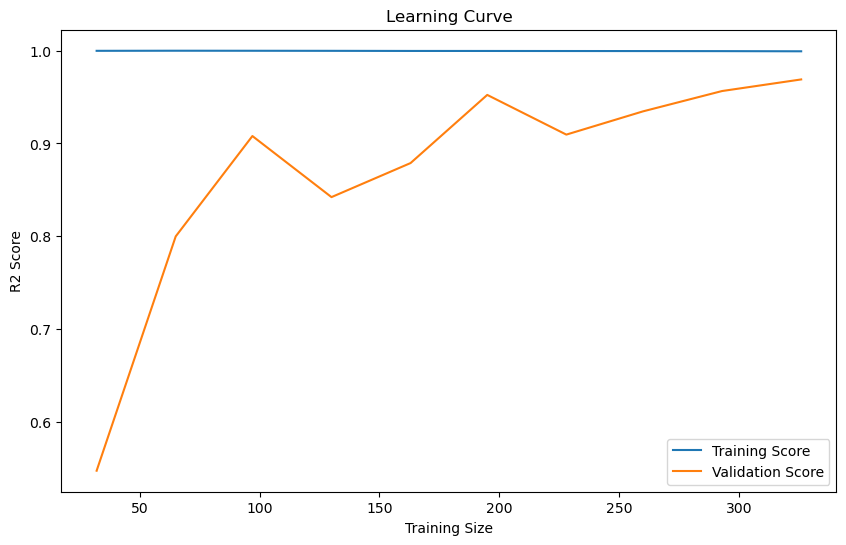

Plotting Residuals for CatBoostRegressor...


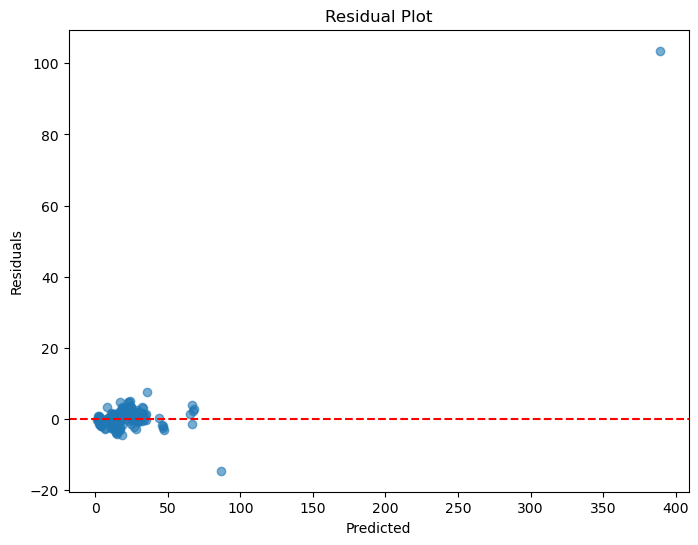

In [53]:
for name, model in best_models.items():
    print(f"Evaluating Model: {name}")
    print("=" * 50)
    
    # Evaluate cross-validation scores
    print(f"Cross-Validation for {name}:")
    evaluate_model_cv(model, X_train, y_train)
    print("-" * 50)
    
    # Plot learning curve
    print(f"Plotting Learning Curve for {name}...")
    plot_learning_curve(model, X_train, y_train)
    
    # Plot residuals
    print(f"Plotting Residuals for {name}...")
    plot_residuals(model, X_test, y_test)
    
    print("=" * 50)
    plt.show()  # Ensure plots are displayed before moving to the next model


In [59]:
output_dir = 'working_models'
for name, model in best_models.items():
    filename = os.path.join(output_dir, f"{name}.pkl")
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved {name} to {filename}")

Saved KNeighborsRegressor to working_models/KNeighborsRegressor.pkl
Saved DecisionTreeRegressor to working_models/DecisionTreeRegressor.pkl
Saved RandomForestRegressor to working_models/RandomForestRegressor.pkl
Saved GradientBoostingRegressor to working_models/GradientBoostingRegressor.pkl
Saved AdaBoostRegressor to working_models/AdaBoostRegressor.pkl
Saved ExtraTreesRegressor to working_models/ExtraTreesRegressor.pkl
Saved BaggingRegressor to working_models/BaggingRegressor.pkl
Saved XGBRegressor to working_models/XGBRegressor.pkl
Saved CatBoostRegressor to working_models/CatBoostRegressor.pkl
